In [56]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sbn

In [65]:
AH = pd.read_csv('tips.csv', sep=",", header=0, index_col=False)

In [58]:

# print('Вопрос №1. Сколько мужчин и сколько женщин заплатили чаевые?')
print()
print(str((AH['sex'][AH['tip'] > 0].value_counts()['Male'])) + ' мужчин заплатили чаевые')
print(str((AH['sex'][AH['tip'] > 0].value_counts()['Female'])) + ' женщин заплатили чаевые')


155 мужчин заплатили чаевые
86 женщин заплатили чаевые


In [60]:
# Определите долю курящих среди мужчин и женщин.
print('Вопрос №2. Определите долю курящих мужчин и женщин')
# Доля курящих мужчин
print(('Доля курящих мужчин равна ' + str(round(AH['sex'][AH['smoker'] == 'Yes'].value_counts()['Male'] / AH['sex'].value_counts()['Male'], 2))))
# Доля курящих женщин
print(('Доля курящих женщин равна ' + str(round(AH['sex'][AH['smoker'] == 'Yes'].value_counts()['Female'] / AH['sex'].value_counts()['Female'], 2))))

Вопрос №2. Определите долю курящих мужчин и женщин
Доля курящих мужчин равна 0.38
Доля курящих женщин равна 0.38


In [48]:
print('Вопрос №3. В какой день недели в среднем было максимальное количество посетителей? Учитывайте размер столика?')

# Пишем в массив уникальные элементы столбца DAY, так как изначально датасет содержит 4 из 7 дней недели и может быть изменён
all_days_list = AH['day'].unique()
# Перебираем массив all_days_list
for i in range(0, len(all_days_list)):
    print('В день недели ' + str(all_days_list[i]) + ' в среднем было ' + str(round(AH['size'][AH['day'] == all_days_list[i]].mean(), 1)) + ' посетителей')


Вопрос №3. В какой день недели в среднем было максимальное количество посетителей? Учитывайте размер столика?
В день недели Sun в среднем было 2.8 посетителей
В день недели Sat в среднем было 2.5 посетителей
В день недели Mon в среднем было 2.0 посетителей
В день недели Thur в среднем было 2.5 посетителей
В день недели Fri в среднем было 2.1 посетителей


In [51]:
print('Вопрос №4. На какое время суток приходится наибольшее количество чаевых?')
# Та же фича, что и с днями недели в датасете, только по времени дня
all_time_list = AH['time'].unique()
for i in range(0, len(all_time_list)):
    print('Во время ' + str(all_time_list[i]) + ' в среднем было ' + str(round(AH['tip'][AH['time'] == all_time_list[i]].mean(), 1)) + ' рублей чаевых')

Вопрос №4. На какое время суток приходится наибольшее количество чаевых?
Во время Dinner в среднем было 3.0 рублей чаевых
Во время Lunch в среднем было 2.7 рублей чаевых


In [50]:

print('Вопрос №5. В какой день недели был заказ с максимальным счётом?')

max_total_bill = AH['total_bill'].max()
max_total_bill_day = AH[AH['total_bill'] == max_total_bill]['day']

print('Заказ с максимальным счётом пришёлся на ' + str(max_total_bill_day.values[0]) + ' и составил ' + str(max_total_bill) + ' долларов')


Вопрос №5. В какой день недели был заказ с максимальным счётом?
Заказ с максимальным счётом пришёлся на Sat и составил 100.18 долларов


<AxesSubplot:xlabel='day', ylabel='total_bill'>

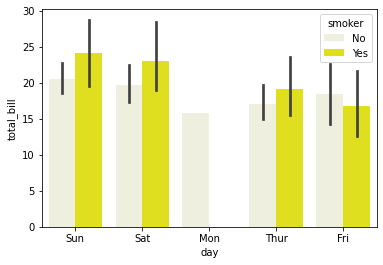

In [53]:

#6 Постройте столбчатую гистограмму, где данные сгруппированы по дню недели (X) и медианное значение общего счета (Y).
# Столбцы для каждого дня должны учитывать, курит посетитель или нет
# sbn.jointplot(x='day', y='total_bill', data=AH)

sbn.barplot(x='day', y='total_bill', hue='smoker', data=AH, color = 'yellow')

array([[<AxesSubplot:title={'center':'tip'}>]], dtype=object)

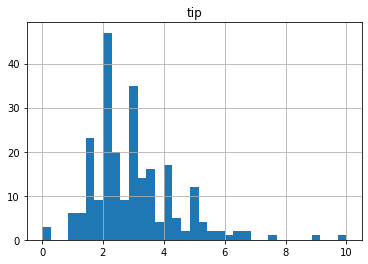

In [101]:
# Построить гистограмму распределения целевого признака - чаевых (tips)
AH.hist('tip',bins=35)

In [102]:
#Преобразовать категориальные признаки (время суток, день) sklearn.preprocessing.OneHotEncoder и бинарные (пол, курение) в числовой вид
#Для преобразования используем метод replace для каждого из столбцов
AH = pd.read_csv('tips.csv', sep=",", header=0, index_col=False)
#Массив преобразуемых данных. Для преобразования какого-либо столбца просто добавить его в этот массив
criteria_list = ['sex','smoker','day','time']
i = 0
for i in range(len(criteria_list)):
    # Формируем массивы всех значений каждого из значений criteria_list
    all_col_values_list = AH[criteria_list[i]].unique()
    # Числовой признак
    for g in range(len(all_col_values_list)):
        print('Уникальное значение столбца ' + str(criteria_list[i]) + ' преобразованов в ' + str(g))
        # Делаем замену непосредственно в самом датасете
        AH[criteria_list[i]].replace({str(all_col_values_list[g]): g}, inplace=True)
# Вывод датасета
AH.head(220)

Уникальное значение столбца sex преобразованов в 0
Уникальное значение столбца sex преобразованов в 1
Уникальное значение столбца smoker преобразованов в 0
Уникальное значение столбца smoker преобразованов в 1
Уникальное значение столбца day преобразованов в 0
Уникальное значение столбца day преобразованов в 1
Уникальное значение столбца day преобразованов в 2
Уникальное значение столбца day преобразованов в 3
Уникальное значение столбца day преобразованов в 4
Уникальное значение столбца time преобразованов в 0
Уникальное значение столбца time преобразованов в 1


,num,total_bill,tip,sex,smoker,day,time,size
0,1,16.99,3.00,0,0,0,0,2
1,2,10.34,3.00,1,0,0,0,3
2,3,21.01,0.00,1,0,0,0,3
3,4,23.68,0.00,1,0,0,0,2
4,5,24.59,0.00,0,0,0,0,4
...,...,...,...,...,...,...,...,...
215,216,12.90,1.10,0,1,1,0,2
216,217,28.15,3.00,1,1,1,0,5
217,218,11.59,1.50,1,1,1,0,2
218,219,7.74,1.44,1,1,1,0,2


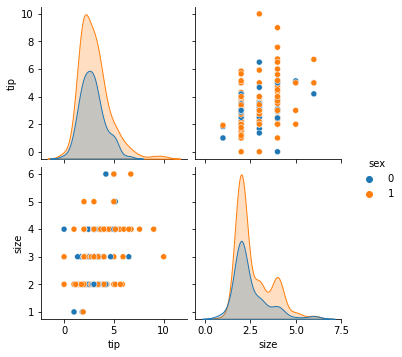

In [105]:
# sbn.pairplot(tips, hue = 'sex', vars = ['tip', 'size'])
# позволяет сопоставить два значения, и представить их в двух видах
sbn.pairplot(AH, hue = 'sex', vars = ['tip', 'size'])

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

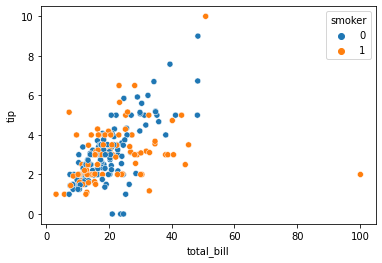

In [109]:
sbn.scatterplot(data=AH, x="total_bill", y="tip", hue="smoker")